In [53]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

The first goal of this project is to simplify the search for new recipes from the website www.bigoven.com based on users' input so that users can save time from clicking the link to see if there's any picture provided and from reading the ingredient lists of each recipe to eliminate the ones that they obviously are not interested in. In order to achieve it, I will need to rely on stemming and converting texts into bags of words in order to have a more accurate filter.

The second goal of this project is to figure out what types of ingredients that seem to work well with what type of dishes. For example, it would be interesting to know that for example, ginger seems to always work well with chicken and vinegar seems to be never used with chicken. The results can be cross-check with popular recipes from well-known chefs from Food Network or any other TV channels. 

The last goal of this project is to figure out the type of the dish that we would be able to make decently given a certain set of ingredients based on clustering and supervised learning. For example, if I already have pepper, beef, ginger, what type of dish that I should really make.

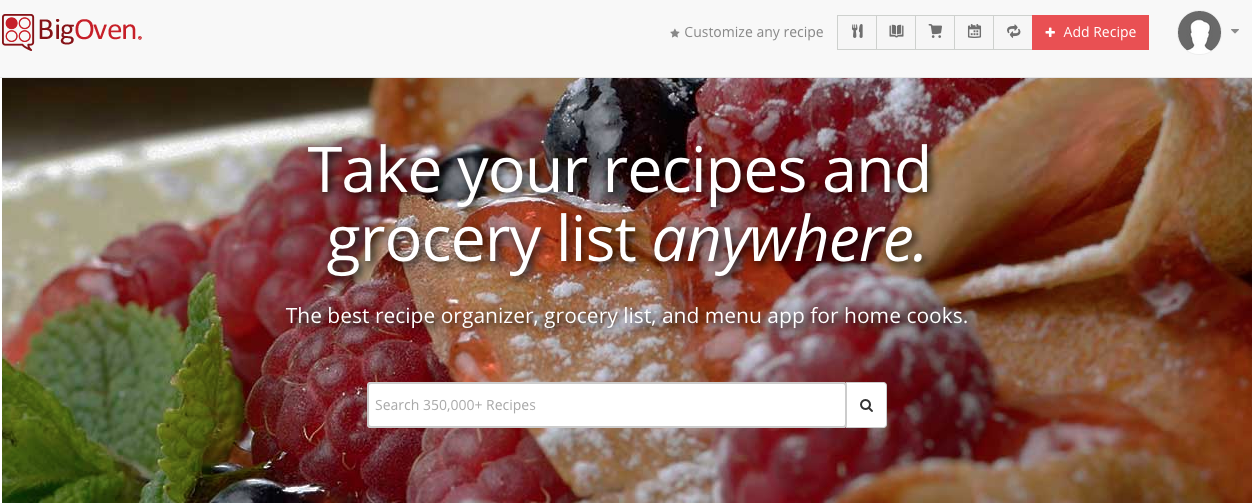

In [21]:
from IPython.display import Image
Image(filename='Images_1/Big_oven_1.png')

For example, if I want to search for Italian chicken on BigOven.com, the results that I receive will provide a bunch of recipes that do not have any ratings, do not have any pictures or worse, have some types of ingredients that I do not want to eat. Therefore, I think it is useful if I can somewhat simplify my search so that I do not need to go through all of the links to figure out which recipe I should definitely ignore. 


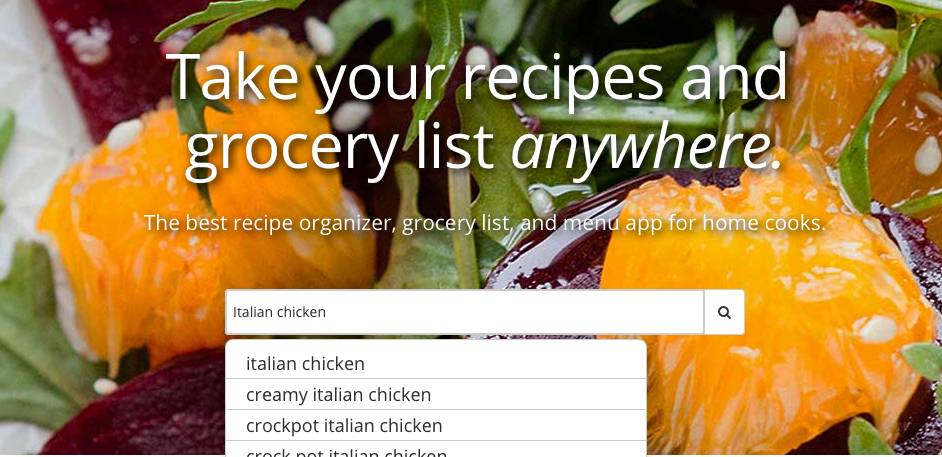

In [22]:
from IPython.display import Image
Image(filename='Images_1/Big_oven_2.png')

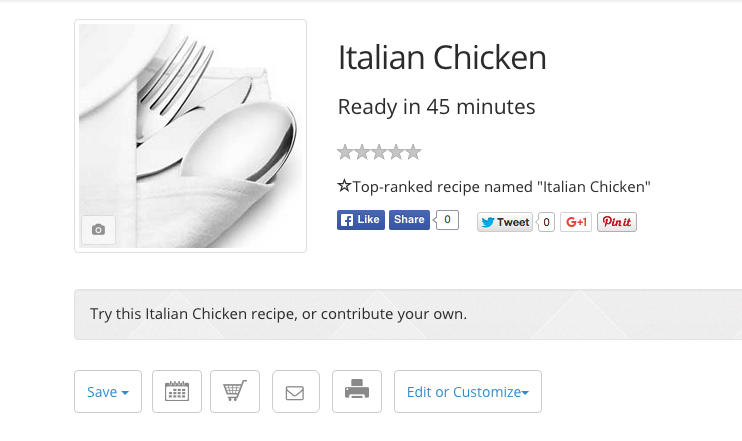

In [54]:
from IPython.display import Image
Image(filename='Images_1/Big_oven_3.png')

If I perform web scraping from the API data that the website Big Oven provides, I can basically extract out the basic information for each search such as Recipe ID, Recipe Cuisine, Recipe Title, Recipe Image Url, Recipe Rating. Using the Recipe ID, I once again can perform web scraping to extract out the information of the ingredient lists, the total minutes that I need to prepare the dish.

In [19]:
f=open("search_df","r")
search_df=dill.load(f)
f.close()
search_df.rename(columns={'ReciptTitle': 'RecipeTitle'}, inplace=True)
#search_df
search_df[['RecipeID','RecipeTitle', 'RecipeCuisine', 'RecipeRating','RecipeUrl']]

,RecipeID,RecipeTitle,RecipeCuisine,RecipeRating,RecipeUrl
0,345615,Italian Chicken,,4.000000,http://redirect.bigoven.com/pics/italian-chick...
1,864092,Italian Chicken,Italian,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
2,326895,Italian Chicken,,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
3,401002,Italian chicken,Italian,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
4,721232,Italian Chicken,,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
5,224492,Italian Chicken,Italian,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
6,409862,Italian Chicken,American,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
7,358672,Italian Chicken,,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
8,403107,Italian Chicken,,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...
9,739594,Italian chicken,,0.000000,http://redirect.bigoven.com/pics/recipe-no-ima...


In [ ]:
Based on the recipe ID, we can extracting out the ingredient list for each recipe according to our search.

In [30]:
#Extract the 
f=open("ingredients_name_all_100","r")
ingredients_name_all_100=dill.load(f)
f.close()

f=open("ingredients_name_all_200","r")
ingredients_name_all_200=dill.load(f)
f.close()

f=open("ingredients_name_all_300","r")
ingredients_name_all_300=dill.load(f)
f.close()

f=open("ingredients_name_all_383","r")
ingredients_name_all_383=dill.load(f)
f.close()


ingredients_name=ingredients_name_all_100+ ingredients_name_all_200 + \
                ingredients_name_all_300 + ingredients_name_all_383


search_df['Ingredients']=ingredients_name
for i in xrange(0, search_df.shape[0]):  
    search_df['Ingredients'].values[i]=[x.lower() for x in search_df['Ingredients'].values[i]]

In [26]:
search_df[['RecipeID','RecipeTitle', 'RecipeCuisine', 'RecipeRating','Ingredients', 'RecipeUrl']]

,RecipeID,RecipeTitle,RecipeCuisine,RecipeRating,Ingredients,RecipeUrl
0,345615,Italian Chicken,,4.000000,"[Chicken breasts boneless and skinless, Italia...",http://redirect.bigoven.com/pics/italian-chick...
1,864092,Italian Chicken,Italian,0.000000,"[cream of mushroom soup, cream cheese, dry ita...",http://redirect.bigoven.com/pics/recipe-no-ima...
2,326895,Italian Chicken,,0.000000,"[Chicken breast, Baby new potatoes, Green Bean...",http://redirect.bigoven.com/pics/recipe-no-ima...
3,401002,Italian chicken,Italian,0.000000,"[Roma Tomatoes, Garlic cloves, artichoke heart...",http://redirect.bigoven.com/pics/recipe-no-ima...
4,721232,Italian Chicken,,0.000000,"[italian dressing, boneless skinless]",http://redirect.bigoven.com/pics/recipe-no-ima...
5,224492,Italian Chicken,Italian,0.000000,"[frozen chicken breast, package spaghetti sauc...",http://redirect.bigoven.com/pics/recipe-no-ima...
6,409862,Italian Chicken,American,0.000000,"[Butter, Italian dressing mix, Chicken breasts...",http://redirect.bigoven.com/pics/recipe-no-ima...
7,358672,Italian Chicken,,0.000000,"[Chicken breast, Zesty Italian Dressing Season...",http://redirect.bigoven.com/pics/recipe-no-ima...
8,403107,Italian Chicken,,0.000000,"[Italian stewed tomatoes, water, minced onion,...",http://redirect.bigoven.com/pics/recipe-no-ima...
9,739594,Italian chicken,,0.000000,"[onion, paprika, olive oil, water, tomato past...",http://redirect.bigoven.com/pics/recipe-no-ima...


Based on the image URL, we can basically eliminate those recipes that have no images since a picture worths a thousand words and it is not exciting to make anything that doesn't show the end results.

In [36]:
#Now remove those that have no pictures
for x in xrange(0, search_df.shape[0]):
    if search_df.ix[x,'RecipeUrl'].find('recipe-no-image')==-1:
        search_df.ix[x,'Imgchk']=False
    else:
        search_df.ix[x,'Imgchk']=True
        search_df1=search_df[search_df['Imgchk']==False]
search_df1.is_copy=False

In [37]:
search_df1[['RecipeID','RecipeTitle', 'RecipeCuisine', 'RecipeRating','Ingredients', 'RecipeUrl']]

,RecipeID,RecipeTitle,RecipeCuisine,RecipeRating,Ingredients,RecipeUrl
0,345615,Italian Chicken,,4.000000,"[chicken breasts boneless and skinless, italia...",http://redirect.bigoven.com/pics/italian-chick...
21,158257,Italian Chicken,Italian,4.750000,"[spaghetti sauce, chicken breasts, mushrooms, ...",http://redirect.bigoven.com/pics/italian-chick...
22,193135,Italian Chicken and Vegetable Pasta,Italian,4.500000,"[boneless skinless chicken breast, italian dre...",http://redirect.bigoven.com/pics/italian-chick...
23,560505,Crockpot Italian Chicken,Italian,5.000000,"[boneless chicken breasts , dry zesty italian ...",http://redirect.bigoven.com/pics/crockpot-ital...
24,159868,Italian Chicken Stew,American,4.285714,"[chicken, chicken, olive oil, green pepper, pe...",http://redirect.bigoven.com/pics/italian-chick...
25,158319,Italian Chicken and Green Olives,Italian,3.857143,"[olive oil, butter, butter, chicken breast fil...",http://redirect.bigoven.com/pics/italian-chick...
26,75941,Crockpot Italian Chicken,American,3.600000,"[onion, onion, boneless skinless chicken, chic...",http://redirect.bigoven.com/pics/crockpot-ital...
27,1161831,Italian Chicken Soup,,0.000000,"[olive oil, cut up fryer chicken, low sodium c...",http://redirect.bigoven.com/pics/italianchicke...
28,101537,Italian- Chicken Cacciatore (Contadina),American,0.000000,"[chicken, chicken, onion, onion, pepper, peppe...",http://redirect.bigoven.com/pics/italian-chick...
29,1264767,Simple Crockpot Italian Chicken,,0.000000,"[chicken breasts, extra virgin olive oil, garl...",http://photos.bigoven.com/recipe/hero/simple-c...


By doing that, we already reduced the number of search from 383 to 90. We also can eliminate the recipe by the ratings or the review counts etc.

In [46]:
search_df2=search_df1[search_df1['RecipeRating']>=3]
search_df2.is_copy=False

In [47]:
search_df2[['RecipeID','RecipeTitle', 'RecipeCuisine', 'RecipeRating','Ingredients', 'RecipeUrl']]

,RecipeID,RecipeTitle,RecipeCuisine,RecipeRating,Ingredients,RecipeUrl
0,345615,Italian Chicken,,4.000000,"[chicken breasts boneless and skinless, italia...",http://redirect.bigoven.com/pics/italian-chick...
21,158257,Italian Chicken,Italian,4.750000,"[spaghetti sauce, chicken breasts, mushrooms, ...",http://redirect.bigoven.com/pics/italian-chick...
22,193135,Italian Chicken and Vegetable Pasta,Italian,4.500000,"[boneless skinless chicken breast, italian dre...",http://redirect.bigoven.com/pics/italian-chick...
23,560505,Crockpot Italian Chicken,Italian,5.000000,"[boneless chicken breasts , dry zesty italian ...",http://redirect.bigoven.com/pics/crockpot-ital...
24,159868,Italian Chicken Stew,American,4.285714,"[chicken, chicken, olive oil, green pepper, pe...",http://redirect.bigoven.com/pics/italian-chick...
25,158319,Italian Chicken and Green Olives,Italian,3.857143,"[olive oil, butter, butter, chicken breast fil...",http://redirect.bigoven.com/pics/italian-chick...
26,75941,Crockpot Italian Chicken,American,3.600000,"[onion, onion, boneless skinless chicken, chic...",http://redirect.bigoven.com/pics/crockpot-ital...
37,188282,Crock Pot Italian Chicken,Italian,4.000000,"[potato, potato, carrot, carrot, chicken breas...",http://redirect.bigoven.com/pics/crock-pot-ita...
43,178782,Italian Chicken Sausage Pasta,Italian,4.000000,"[olive oil, italian chicken sausage, chicken, ...",http://redirect.bigoven.com/pics/italian-chick...
46,189510,Italian Chicken and Vegetable Soup,Italian,4.500000,"[olive oil, onion, carrots, zucchini, zucchini...",http://redirect.bigoven.com/pics/italian-chick...


The next step that we need to work on is dealing with the ingredients to eliminate what we do not want. The most naive way to do is just search for the key words and eliminate those recipes that have that name of the ingredient. For example, if my friend cannot eat spicy food, I can try to eliminate those recipes with the words :"chili flake".

In [50]:
Ingrchk=[]
for x in xrange(0, search_df1.shape[0]):
    temp=False
    for j in search_df1['Ingredients'].values[x]:
        if j.find('chili flake')!=-1:
            temp=True
    Ingrchk.append(temp)
    
search_df1['Ingrchk']=Ingrchk
find_df=search_df1[search_df1['Ingrchk']==True]
find_df.is_copy=False
find_df

,RecipeCuisine,RecipeID,RecipeRating,RecipeUrl,RecipeTitle,ingredients_name,Ingredients,Imgchk,Ingrchk
250,,1231475,0,http://photos.bigoven.com/recipe/hero/gluten-f...,Gluten-Free Italian Baked Chicken Meatballs,"[ground dark meat chicken or turkey, large egg...","[ground dark meat chicken or turkey, large egg...",False,True
253,American,878156,0,http://redirect.bigoven.com/pics/chicken-itali...,Chicken Italian Sausage -Home Made,"[Boneless chicken, Salt, Black pepper, Chili f...","[boneless chicken, salt, black pepper, chili f...",False,True


For this problem, we will need to rely on bag of words and stemming to be able to eliminate correctly those ingredients that actually use the different names. For example, chili flakes and chili powder should all together be eliminated from our list.

In [51]:
#Ok, now work with set of ingredients
ingredient_set=set()
ingredient_dict={}

for i in xrange(0, search_df.shape[0]):  
    #search_df1['Ingredients'].values[i]=[x.lower() for x in search_df1['Ingredients'].values[i]]  
    temp=set(search_df.ix[i,'Ingredients'])

    for j in temp:
        chk = ingredient_dict.get(j)
        if chk is not None:
            ingredient_dict[j]+=1
        else:
            ingredient_dict[j]=1

#print ingredient_dict
from matplotlib import pyplot as plt

ingredient_df=pd.DataFrame({'ingredient_name' : ingredient_dict.keys() ,\
                            'count' : ingredient_dict.values()}).sort('count',ascending=False)

#ingredient_df

ingredient_df_sub=ingredient_df[:20]

In [52]:
ingredient_df_sub

,count,ingredient_name
707,96,garlic
611,93,olive oil
484,78,salt
775,69,onion
63,68,pepper
501,67,chicken
90,45,water
646,43,cream cheese
110,41,cream of chicken soup
8,40,parmesan


As you can see, if we don't really performing grouping and stemming, it seems to me garlic appears to be the most important ingredients for the recipe for Italian chicken. It should make more sense if it has been chicken instead because after all, my search is chicken.  Therefore, for my next steps, I will need to group and stem my list of ingredients to make it in a broader categories.